### 1. Load the dataset  

a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly. 

In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [428]:
blog_df=pd.read_csv('blogtext.csv',header=0)

In [429]:
blog_df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."


#### This dataset has 7 columns. But the columns of interest are "gender","age","topic","sign" and"text".

In [430]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [431]:
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

#### All columns has object data except for age and ID. There are no missing values in the data.

In [432]:
blog_df['age']=blog_df['age'].astype(str)

#### Number of unique topics in topics column are and their values count

In [433]:
np.unique(blog_df['topic'])

array(['Accounting', 'Advertising', 'Agriculture', 'Architecture', 'Arts',
       'Automotive', 'Banking', 'Biotech', 'BusinessServices',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Government',
       'HumanResources', 'Internet', 'InvestmentBanking', 'Law',
       'LawEnforcement-Security', 'Manufacturing', 'Maritime',
       'Marketing', 'Military', 'Museums-Libraries', 'Non-Profit',
       'Publishing', 'RealEstate', 'Religion', 'Science',
       'Sports-Recreation', 'Student', 'Technology', 'Telecommunications',
       'Tourism', 'Transportation', 'indUnk'], dtype=object)

In [434]:
len(np.unique(blog_df['topic']))

40

In [435]:
blog_df['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

#### Number of values in Sign column are :

In [436]:
blog_df['sign'].value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

#### Number of values in age column are:

In [437]:
blog_df['age'].value_counts()

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64

#### Number of values in gender columns are :

In [438]:
blog_df['gender'].value_counts()

male      345193
female    336091
Name: gender, dtype: int64

#### There are no nulls in the data. Therefore, no further cleaning is required.

In [439]:
blog_df=blog_df.drop(['id','date'],axis=1)

In [440]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 5 columns):
gender    681284 non-null object
age       681284 non-null object
topic     681284 non-null object
sign      681284 non-null object
text      681284 non-null object
dtypes: object(5)
memory usage: 26.0+ MB


### Creating a sample and checking its data distribution

#### Since, the data is huge and the size will further increase upon creating tokens, we will consider only a fraction of the original data for our model. In this case, it will be 20000 records.

In [441]:
blog_df_sub=blog_df[:20000]

In [442]:
blog_df_sub

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...
19995,male,16,Student,Pisces,Writing tests are retarded......
19996,male,16,Student,Pisces,Ok nothing happened that was ...
19997,male,16,Student,Pisces,So Daniel who do you want to ...
19998,male,16,Student,Pisces,I finally got around to seein...


#### We make sure that the sample data is a good representation of the original data by checking the counts of various significant columns such as "Topic","Sign","Gender", "Age" which are going to be our multiclass labels.

In [443]:
len(np.unique(blog_df_sub['topic']))

36

In [444]:
blog_df_sub['topic'].value_counts()

indUnk                     7789
Technology                 2989
Student                    2637
Fashion                    1622
Internet                    778
Education                   759
Communications-Media        414
Arts                        358
Engineering                 357
Marketing                   207
Non-Profit                  204
Government                  187
BusinessServices            184
Religion                    182
Consulting                  166
Sports-Recreation           120
Automotive                  111
Manufacturing                93
LawEnforcement-Security      90
Banking                      89
Science                      87
InvestmentBanking            71
Publishing                   70
Museums-Libraries            67
Law                          47
Transportation               46
Agriculture                  46
Architecture                 45
Advertising                  42
Biotech                      36
Accounting                   35
Construc

In [445]:
blog_df_sub['sign'].value_counts()

Aries          5209
Sagittarius    2153
Leo            1732
Pisces         1678
Cancer         1536
Scorpio        1485
Taurus         1330
Aquarius       1313
Libra           983
Capricorn       930
Virgo           871
Gemini          780
Name: sign, dtype: int64

In [446]:
blog_df_sub['age'].value_counts()

35    2494
27    2320
23    1963
17    1961
36    1726
24    1557
16    1236
25    1190
15    1097
26     919
34     871
14     811
33     769
48     240
46     188
37     130
13     113
39     105
38      85
41      82
45      72
42      47
44       9
47       8
43       6
40       1
Name: age, dtype: int64

In [447]:
blog_df_sub['gender'].value_counts()

male      11354
female     8646
Name: gender, dtype: int64

In [448]:
blog_df_sub

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...
19995,male,16,Student,Pisces,Writing tests are retarded......
19996,male,16,Student,Pisces,Ok nothing happened that was ...
19997,male,16,Student,Pisces,So Daniel who do you want to ...
19998,male,16,Student,Pisces,I finally got around to seein...


In [449]:
blog_df_sub['topic'].value_counts()

indUnk                     7789
Technology                 2989
Student                    2637
Fashion                    1622
Internet                    778
Education                   759
Communications-Media        414
Arts                        358
Engineering                 357
Marketing                   207
Non-Profit                  204
Government                  187
BusinessServices            184
Religion                    182
Consulting                  166
Sports-Recreation           120
Automotive                  111
Manufacturing                93
LawEnforcement-Security      90
Banking                      89
Science                      87
InvestmentBanking            71
Publishing                   70
Museums-Libraries            67
Law                          47
Transportation               46
Agriculture                  46
Architecture                 45
Advertising                  42
Biotech                      36
Accounting                   35
Construc

### 2. Preprocess rows of the “text” column

#### As a part of preprocessing, the "text" column would be cleaned up for unwanted characters, converted all to lower case, all extra spaces willl be removed, Lemmitised and stopwords will be removed. These are couple of preprocessing steps. There aer also other techniques such as stemming, POS tagging ,etc which we will not be using here.

In [450]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaishu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaishu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaishu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [451]:
import re
import unicodedata
from nltk.stem import WordNetLemmatizer

#### a.Remove unwanted characters

#### b. Convert text to lowercase

#### c. Remove unwanted spaces

In [452]:
def remove_accented_chars(text):
    normalized_corpus = []
    
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [453]:
def remove_special_characters(text, remove_digits=False):
    #Using regex
     pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
     text = re.sub(pattern, '', text)
     return text

### Text Lemmatization

In [454]:
def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()]) 

In [455]:
def normalize_corpus(corpus, accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
         # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [456]:
blog_df_sub['clean_Text']=normalize_corpus((blog_df_sub['text']))

In [457]:
blog_df_sub

,gender,age,topic,sign,text,clean_Text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info ha been found pages and mb of pdf files n...
1,male,15,Student,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
...,...,...,...,...,...,...
19995,male,16,Student,Pisces,Writing tests are retarded......,writing test are retarded along with chemistry...
19996,male,16,Student,Pisces,Ok nothing happened that was ...,ok nothing happened that wa crazy except i chi...
19997,male,16,Student,Pisces,So Daniel who do you want to ...,so daniel who do you want to win the election ...
19998,male,16,Student,Pisces,I finally got around to seein...,i finally got around to seeing the passion of ...


#### d.Removing Stop Words

In [458]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [459]:
!python -m spacy download en_core_web_sm
import spacy

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [460]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [461]:
deselect_stop_words=['no','not']
for i in deselect_stop_words:
    nlp.vocab[i].is_stop=False

In [462]:
stop=stopwords.words('english')

In [463]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [464]:
blog_df_sub.clean_Text=blog_df_sub.clean_Text.apply(lambda x:' '.join(word for word in x.split() if word not in stop))

In [465]:
blog_df_sub

,gender,age,topic,sign,text,clean_Text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info ha found pages mb pdf files wait untill t...
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture url popups mean s...
...,...,...,...,...,...,...
19995,male,16,Student,Pisces,Writing tests are retarded......,writing test retarded along chemistry project ...
19996,male,16,Student,Pisces,Ok nothing happened that was ...,ok nothing happened wa crazy except chipped ba...
19997,male,16,Student,Pisces,So Daniel who do you want to ...,daniel want win election get question alot ok ...
19998,male,16,Student,Pisces,I finally got around to seein...,finally got around seeing passion christ well ...


In [466]:
blog_df_sub.clean_Text.sample(5)

16668    christmas time always little hectic try finish...
4100     early morning delights arriving work rarely ha...
13547    interesting weekend say least fizzgig wa aweso...
3186                                          woman idiots
17023    course anyone within confessional church westm...
Name: clean_Text, dtype: object

### 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence 
a. Label columns to merge: “gender”, “age”, “topic”, “sign” 

b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image

In [467]:
blog_df_sub['Label']=blog_df_sub[['gender','age','topic','sign']].values.tolist()

In [468]:
blog_df_clean=blog_df_sub

In [469]:
blog_df_clean

,gender,age,topic,sign,text,clean_Text,Label
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info ha found pages mb pdf files wait untill t...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture url popups mean s...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...,...,...,...,...,...
19995,male,16,Student,Pisces,Writing tests are retarded......,writing test retarded along chemistry project ...,"[male, 16, Student, Pisces]"
19996,male,16,Student,Pisces,Ok nothing happened that was ...,ok nothing happened wa crazy except chipped ba...,"[male, 16, Student, Pisces]"
19997,male,16,Student,Pisces,So Daniel who do you want to ...,daniel want win election get question alot ok ...,"[male, 16, Student, Pisces]"
19998,male,16,Student,Pisces,I finally got around to seein...,finally got around seeing passion christ well ...,"[male, 16, Student, Pisces]"


### 4. Separate features and labels, and split the data into training and testing

In [470]:
X=blog_df_clean['clean_Text']
Y=blog_df_clean['Label']

In [471]:
print(X)

0        info ha found pages mb pdf files wait untill t...
1        team members drewes van der laag urllink mail ...
2        het kader van kernfusie op aarde maak je eigen...
3                                          testing testing
4        thanks yahoo toolbar capture url popups mean s...
                               ...                        
19995    writing test retarded along chemistry project ...
19996    ok nothing happened wa crazy except chipped ba...
19997    daniel want win election get question alot ok ...
19998    finally got around seeing passion christ well ...
19999    chemistry teacher must think funny make stress...
Name: clean_Text, Length: 20000, dtype: object


In [472]:
print(Y)

0                       [male, 15, Student, Leo]
1                       [male, 15, Student, Leo]
2                       [male, 15, Student, Leo]
3                       [male, 15, Student, Leo]
4        [male, 33, InvestmentBanking, Aquarius]
                          ...                   
19995                [male, 16, Student, Pisces]
19996                [male, 16, Student, Pisces]
19997                [male, 16, Student, Pisces]
19998                [male, 16, Student, Pisces]
19999                [male, 16, Student, Pisces]
Name: Label, Length: 20000, dtype: object


#### split X and Y into training and testing sets

In [473]:
from sklearn.model_selection import train_test_split

In [474]:

blog_train, blog_test, label_train, label_test = train_test_split(X, Y, random_state=2)

In [475]:
#Traing data
print(blog_train.shape)
print(label_train.shape)

(15000,)
(15000,)


In [476]:
#Test Data
print(blog_test.shape)
print(label_test.shape)

(5000,)
(5000,)


In [477]:
label_train

8321                [female, 26, indUnk, Pisces]
11705            [female, 24, Banking, Aquarius]
19213    [male, 48, Communications-Media, Aries]
3041               [male, 35, Technology, Aries]
11499          [female, 36, Internet, Capricorn]
                          ...                   
1099                [female, 15, Student, Libra]
18898                [male, 26, Student, Pisces]
11798               [male, 25, Internet, Cancer]
6637                  [male, 36, Fashion, Aries]
2575               [male, 35, Technology, Aries]
Name: Label, Length: 15000, dtype: object

### 5. Vectorize the features (5 points) 
a. Create a Bag of Words using count vectorizer 

i. Use ngram_range=(1, 2) 
 
ii. Vectorize training and testing features

b. Print the term-document matrix

In [478]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(ngram_range=(1,2),min_df=2,max_df=0.5)

In [479]:
cvect.fit(blog_train)

len(cvect.vocabulary_)

175738

In [480]:
cvect.vocabulary_

{'well': 166936,
 'weekend': 166562,
 'held': 65701,
 'quite': 118422,
 'surprise': 143672,
 'friend': 51178,
 'friday': 51094,
 'went': 167629,
 'see': 128853,
 'manchurian': 90691,
 'candidate': 19249,
 'lovely': 88502,
 'little': 85246,
 'movie': 96998,
 'denzel': 33160,
 'wa': 160819,
 'good': 58103,
 'part': 108717,
 'came': 18910,
 'throughout': 150471,
 'film': 47550,
 'one': 105354,
 'involves': 73927,
 'biting': 14250,
 'crap': 28996,
 'someone': 135858,
 'ala': 2462,
 'mike': 94129,
 'tyson': 156782,
 'despite': 33507,
 'crazy': 29109,
 'actions': 813,
 'pretty': 115757,
 'saturday': 126553,
 'night': 102312,
 'vegetarian': 160006,
 'grub': 60806,
 'failed': 44959,
 'attempt': 8482,
 'getting': 54812,
 'palm': 108213,
 'read': 119486,
 'check': 21950,
 'party': 109044,
 'posted': 114932,
 'yahoo': 173600,
 'online': 106485,
 'group': 60595,
 'called': 18708,
 'la': 79108,
 'fun': 52303,
 'joining': 75701,
 'connect': 26515,
 'west': 168073,
 'coast': 24273,
 'peeps': 109831,


In [481]:
#Convert Training blog text  into numerical values
blog_train_ngram = cvect.transform(blog_train)

blog_train_ngram.shape

(15000, 175738)

### Printing Term-Document Marix

In [482]:
print(blog_train_ngram[0])

  (0, 813)	1
  (0, 831)	1
  (0, 2206)	1
  (0, 2298)	1
  (0, 2311)	1
  (0, 2462)	1
  (0, 7129)	1
  (0, 7154)	1
  (0, 8469)	1
  (0, 8482)	2
  (0, 10902)	1
  (0, 10947)	1
  (0, 13454)	1
  (0, 14007)	1
  (0, 14250)	1
  (0, 18504)	1
  (0, 18708)	1
  (0, 18910)	1
  (0, 19077)	1
  (0, 19249)	1
  (0, 19729)	1
  (0, 21337)	1
  (0, 21950)	1
  (0, 24180)	1
  (0, 24273)	1
  :	:
  (0, 156085)	1
  (0, 156782)	1
  (0, 160006)	1
  (0, 160044)	1
  (0, 160819)	6
  (0, 160928)	1
  (0, 160994)	1
  (0, 161636)	1
  (0, 162124)	1
  (0, 162262)	1
  (0, 162683)	1
  (0, 166562)	1
  (0, 166936)	2
  (0, 167408)	1
  (0, 167529)	1
  (0, 167629)	2
  (0, 167694)	1
  (0, 167947)	1
  (0, 168073)	1
  (0, 168077)	1
  (0, 168444)	1
  (0, 168983)	1
  (0, 170749)	1
  (0, 171116)	1
  (0, 173600)	1


In [483]:
blog_test_ngram = cvect.transform(blog_test)

blog_test_ngram.shape

(5000, 175738)

In [484]:
print(blog_test_ngram[0])

  (0, 3443)	1
  (0, 7129)	1
  (0, 8291)	1
  (0, 9253)	1
  (0, 9548)	1
  (0, 12615)	1
  (0, 19729)	4
  (0, 19758)	1
  (0, 19760)	1
  (0, 19895)	1
  (0, 20314)	1
  (0, 22496)	1
  (0, 25337)	1
  (0, 25342)	1
  (0, 27695)	1
  (0, 27738)	2
  (0, 27882)	1
  (0, 27988)	1
  (0, 30046)	1
  (0, 35440)	1
  (0, 35613)	1
  (0, 35735)	1
  (0, 35857)	1
  (0, 37202)	1
  (0, 37686)	1
  :	:
  (0, 152382)	1
  (0, 159195)	2
  (0, 159548)	1
  (0, 160819)	1
  (0, 161786)	1
  (0, 163194)	1
  (0, 166936)	2
  (0, 167140)	1
  (0, 167626)	1
  (0, 167629)	3
  (0, 167791)	1
  (0, 167955)	1
  (0, 168113)	1
  (0, 169250)	2
  (0, 169423)	1
  (0, 169958)	1
  (0, 170064)	1
  (0, 170115)	1
  (0, 170749)	1
  (0, 171215)	1
  (0, 172001)	2
  (0, 172211)	1
  (0, 173757)	1
  (0, 173899)	1
  (0, 173912)	1


### 6.Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label.

In [485]:
from collections import Counter

In [486]:
label_train

8321                [female, 26, indUnk, Pisces]
11705            [female, 24, Banking, Aquarius]
19213    [male, 48, Communications-Media, Aries]
3041               [male, 35, Technology, Aries]
11499          [female, 36, Internet, Capricorn]
                          ...                   
1099                [female, 15, Student, Libra]
18898                [male, 26, Student, Pisces]
11798               [male, 25, Internet, Cancer]
6637                  [male, 36, Fashion, Aries]
2575               [male, 35, Technology, Aries]
Name: Label, Length: 15000, dtype: object

In [487]:
ar=label_train
concat_list = [j for i in ar for j in i]

In [488]:
concat_list

['female',
 '26',
 'indUnk',
 'Pisces',
 'female',
 '24',
 'Banking',
 'Aquarius',
 'male',
 '48',
 'Communications-Media',
 'Aries',
 'male',
 '35',
 'Technology',
 'Aries',
 'female',
 '36',
 'Internet',
 'Capricorn',
 'female',
 '27',
 'indUnk',
 'Sagittarius',
 'male',
 '16',
 'indUnk',
 'Cancer',
 'female',
 '33',
 'indUnk',
 'Pisces',
 'female',
 '23',
 'indUnk',
 'Cancer',
 'female',
 '24',
 'indUnk',
 'Pisces',
 'female',
 '25',
 'indUnk',
 'Aquarius',
 'female',
 '14',
 'indUnk',
 'Leo',
 'male',
 '35',
 'Technology',
 'Aries',
 'female',
 '27',
 'Religion',
 'Taurus',
 'female',
 '38',
 'Internet',
 'Sagittarius',
 'male',
 '17',
 'Student',
 'Cancer',
 'female',
 '17',
 'indUnk',
 'Scorpio',
 'male',
 '41',
 'Engineering',
 'Gemini',
 'male',
 '27',
 'indUnk',
 'Sagittarius',
 'female',
 '34',
 'indUnk',
 'Sagittarius',
 'female',
 '26',
 'indUnk',
 'Aquarius',
 'male',
 '26',
 'Science',
 'Scorpio',
 'female',
 '23',
 'Arts',
 'Capricorn',
 'female',
 '23',
 'indUnk',
 'Tau

In [489]:
for i in range(1,10):
    count= Counter(concat_list)    

In [490]:
count_dict=dict(count)

In [491]:
count_dict

{'female': 6537,
 '26': 689,
 'indUnk': 5852,
 'Pisces': 1269,
 '24': 1176,
 'Banking': 71,
 'Aquarius': 964,
 'male': 8463,
 '48': 183,
 'Communications-Media': 306,
 'Aries': 3906,
 '35': 1846,
 'Technology': 2242,
 '36': 1315,
 'Internet': 565,
 'Capricorn': 711,
 '27': 1766,
 'Sagittarius': 1627,
 '16': 934,
 'Cancer': 1143,
 '33': 565,
 '23': 1463,
 '25': 878,
 '14': 583,
 'Leo': 1269,
 'Religion': 141,
 'Taurus': 992,
 '38': 68,
 '17': 1489,
 'Student': 1979,
 'Scorpio': 1150,
 '41': 60,
 'Engineering': 271,
 'Gemini': 590,
 '34': 656,
 'Science': 65,
 'Arts': 269,
 'BusinessServices': 143,
 'Fashion': 1236,
 'Architecture': 28,
 '15': 828,
 'Virgo': 643,
 '37': 91,
 'Education': 547,
 'Accounting': 24,
 'Libra': 736,
 'Marketing': 166,
 'Agriculture': 32,
 'Consulting': 132,
 'Sports-Recreation': 88,
 '46': 137,
 '45': 50,
 'Government': 146,
 'Automotive': 86,
 'InvestmentBanking': 52,
 'RealEstate': 6,
 'Non-Profit': 144,
 'Manufacturing': 68,
 '39': 80,
 '13': 87,
 'Advertisi

In [492]:
#unique tokens
len(count_dict)

75

### 7.  Transform the labels .As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer 

In [493]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [494]:
label_train_num=mlb.fit_transform(label_train)

In [495]:
label_train_num.shape

(15000, 75)

In [496]:
label_train_num[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0])

In [497]:
blog_train_ngram.shape

(15000, 175738)

In [498]:
label_train

8321                [female, 26, indUnk, Pisces]
11705            [female, 24, Banking, Aquarius]
19213    [male, 48, Communications-Media, Aries]
3041               [male, 35, Technology, Aries]
11499          [female, 36, Internet, Capricorn]
                          ...                   
1099                [female, 15, Student, Libra]
18898                [male, 26, Student, Pisces]
11798               [male, 25, Internet, Cancer]
6637                  [male, 36, Fashion, Aries]
2575               [male, 35, Technology, Aries]
Name: Label, Length: 15000, dtype: object

In [499]:
mlb.inverse_transform(label_train_num)

[('26', 'Pisces', 'female', 'indUnk'),
 ('24', 'Aquarius', 'Banking', 'female'),
 ('48', 'Aries', 'Communications-Media', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('36', 'Capricorn', 'Internet', 'female'),
 ('27', 'Sagittarius', 'female', 'indUnk'),
 ('16', 'Cancer', 'indUnk', 'male'),
 ('33', 'Pisces', 'female', 'indUnk'),
 ('23', 'Cancer', 'female', 'indUnk'),
 ('24', 'Pisces', 'female', 'indUnk'),
 ('25', 'Aquarius', 'female', 'indUnk'),
 ('14', 'Leo', 'female', 'indUnk'),
 ('35', 'Aries', 'Technology', 'male'),
 ('27', 'Religion', 'Taurus', 'female'),
 ('38', 'Internet', 'Sagittarius', 'female'),
 ('17', 'Cancer', 'Student', 'male'),
 ('17', 'Scorpio', 'female', 'indUnk'),
 ('41', 'Engineering', 'Gemini', 'male'),
 ('27', 'Sagittarius', 'indUnk', 'male'),
 ('34', 'Sagittarius', 'female', 'indUnk'),
 ('26', 'Aquarius', 'female', 'indUnk'),
 ('26', 'Science', 'Scorpio', 'male'),
 ('23', 'Arts', 'Capricorn', 'female'),
 ('23', 'Taurus', 'female', 'indUnk'),
 ('16', 'Scorpio',

In [500]:
label_test_num=mlb.fit_transform(label_test)

In [501]:
mlb.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45',
       '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Communications-Media', 'Construction', 'Consulting', 'Education',
       'Engineering', 'Fashion', 'Gemini', 'Government', 'HumanResources',
       'Internet', 'InvestmentBanking', 'Law', 'LawEnforcement-Security',
       'Leo', 'Libra', 'Manufacturing', 'Marketing', 'Military',
       'Museums-Libraries', 'Non-Profit', 'Pisces', 'Publishing',
       'RealEstate', 'Religion', 'Sagittarius', 'Science', 'Scorpio',
       'Sports-Recreation', 'Student', 'Taurus', 'Technology',
       'Telecommunications', 'Transportation', 'Virgo', 'female',
       'indUnk', 'male'], dtype=object)

In [502]:
classes=mlb.classes_

In [503]:
classes.astype(str)

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45',
       '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Communications-Media', 'Construction', 'Consulting', 'Education',
       'Engineering', 'Fashion', 'Gemini', 'Government', 'HumanResources',
       'Internet', 'InvestmentBanking', 'Law', 'LawEnforcement-Security',
       'Leo', 'Libra', 'Manufacturing', 'Marketing', 'Military',
       'Museums-Libraries', 'Non-Profit', 'Pisces', 'Publishing',
       'RealEstate', 'Religion', 'Sagittarius', 'Science', 'Scorpio',
       'Sports-Recreation', 'Student', 'Taurus', 'Technology',
       'Telecommunications', 'Transportation', 'Virgo', 'female',
       'indUnk', 'male'], dtype='<U23')

### 8.  Choose a classifier. In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

In [504]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [505]:
clf=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=2)
OVR=OneVsRestClassifier(clf)

In [506]:
OVR.fit(blog_train_ngram,label_train_num)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=2, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False),
                    n_jobs=None)

In [507]:
from sklearn import metrics

In [508]:
predict=OVR.predict(blog_test_ngram)

In [509]:
LR_Accuracy=metrics.accuracy_score(label_test_num, OVR.predict(blog_test_ngram))

In [510]:
from sklearn.svm import LinearSVC

In [511]:
Lsvc=LinearSVC(random_state=1)
OVR1=OneVsRestClassifier(Lsvc)

In [512]:
OVR1.fit(blog_train_ngram,label_train_num)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=1, tol=0.0001, verbose=0),
                    n_jobs=None)

In [513]:
predict1=OVR1.predict(blog_test_ngram)

In [514]:
SV_Accuracy=metrics.accuracy_score(label_test_num, predict1)

### 9. Fit the classifier, make predictions and get the accuracy (5 points) 
a. Print the following 
i. Accuracy score 

ii. F1 score 

iii. Average precision score 

iv. Average recall score 

In [515]:
print("Logistic Regression Accuracy:",LR_Accuracy*100 )
print("Linear SVM:",SV_Accuracy*100 )

Logistic Regression Accuracy: 16.939999999999998
Linear SVM: 14.899999999999999


#### Confusion Matrix for Logistic regression model

In [516]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [517]:
cm_pred = multilabel_confusion_matrix(label_test_num,predict)
print(cm_pred)

[[[4973    1]
  [  23    3]]

 [[4741   31]
  [ 168   60]]

 [[4697   34]
  [ 207   62]]

 [[4640   58]
  [ 234   68]]

 [[4432   96]
  [ 340  132]]

 [[4421   79]
  [ 388  112]]

 [[4568   51]
  [ 235  146]]

 [[4651   37]
  [ 271   41]]

 [[4752   18]
  [ 195   35]]

 [[4356   90]
  [ 357  197]]

 [[4778   18]
  [ 160   44]]

 [[4772   13]
  [ 100  115]]

 [[4245  107]
  [ 370  278]]

 [[4554   35]
  [ 210  201]]

 [[4955    6]
  [  36    3]]

 [[4982    1]
  [  15    2]]

 [[4974    1]
  [  22    3]]

 [[4997    2]
  [   1    0]]

 [[4975    3]
  [  22    0]]

 [[4991    0]
  [   9    0]]

 [[4997    0]
  [   3    0]]

 [[4974    4]
  [  20    2]]

 [[4948    1]
  [  44    7]]

 [[4998    0]
  [   2    0]]

 [[4936    7]
  [  45   12]]

 [[4989    0]
  [  11    0]]

 [[4988    1]
  [   7    4]]

 [[4985    1]
  [  14    0]]

 [[4608   43]
  [ 249  100]]

 [[4982    1]
  [  17    0]]

 [[3410  287]
  [ 570  733]]

 [[4904    7]
  [  72   17]]

 [[4971    4]
  [  16    9]]

 [[4981   

#### Classification Report for Logistic Regression Model

In [518]:
print(classification_report(label_test_num, predict,target_names=classes))

                         precision    recall  f1-score   support

                     13       0.75      0.12      0.20        26
                     14       0.66      0.26      0.38       228
                     15       0.65      0.23      0.34       269
                     16       0.54      0.23      0.32       302
                     17       0.58      0.28      0.38       472
                     23       0.59      0.22      0.32       500
                     24       0.74      0.38      0.51       381
                     25       0.53      0.13      0.21       312
                     26       0.66      0.15      0.25       230
                     27       0.69      0.36      0.47       554
                     33       0.71      0.22      0.33       204
                     34       0.90      0.53      0.67       215
                     35       0.72      0.43      0.54       648
                     36       0.85      0.49      0.62       411
                     37 

### The average precision score and recall score

In [519]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes=len(mlb.classes_)
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(label_test_num[:, i],
                                                        predict[:, i])
    average_precision[i] = average_precision_score(label_test_num[:, i], predict[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(label_test_num.ravel(),
    predict.ravel())
average_precision["micro"] = average_precision_score(label_test_num, predict,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))


Average precision score, micro-averaged over all classes: 0.35


### Plot the micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.35')

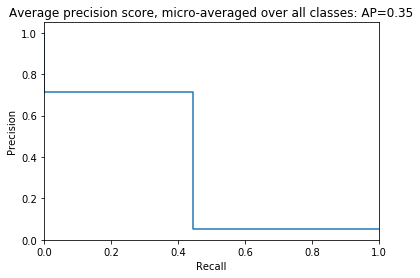

In [520]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

### 10.  Print true label and predicted label for any five example

In [521]:
true_label=mlb.inverse_transform(label_test_num)

In [522]:
predicted_labels=mlb.inverse_transform(predict)

In [527]:
for i in range(1,30):
    if true_label[i]==predicted_labels[i]:
        print('matched True Label:-> ',true_label[i])
        print('matched Predicted Label:->',predicted_labels[i])
    else:
        print('unmatched True Label:-> ',true_label[i])
        print('unmatched Predicted Label:->',predicted_labels[i])
 

matched True Label:->  ('35', 'Aries', 'Technology', 'male')
matched Predicted Label:-> ('35', 'Aries', 'Technology', 'male')
unmatched True Label:->  ('33', 'Pisces', 'female', 'indUnk')
unmatched Predicted Label:-> ('male',)
unmatched True Label:->  ('27', 'Aquarius', 'Education', 'female')
unmatched Predicted Label:-> ('female',)
unmatched True Label:->  ('26', 'Consulting', 'Leo', 'female')
unmatched Predicted Label:-> ('male',)
unmatched True Label:->  ('35', 'Aries', 'Technology', 'male')
unmatched Predicted Label:-> ('male',)
unmatched True Label:->  ('14', 'Leo', 'Student', 'female')
unmatched Predicted Label:-> ('14', 'Cancer', 'Leo', 'Student', 'female')
unmatched True Label:->  ('17', 'Scorpio', 'female', 'indUnk')
unmatched Predicted Label:-> ('17', 'female', 'indUnk')
unmatched True Label:->  ('15', 'Virgo', 'indUnk', 'male')
unmatched Predicted Label:-> ('Aries', 'indUnk', 'male')
unmatched True Label:->  ('24', 'Aries', 'Technology', 'male')
unmatched Predicted Label:-> 

### conclusion: The Logistic Regression model performs better than the linear SVC. The accuracy is as low as 17 % becuase of the data that was sampled. Due to machine limitation data samples were confined to 20000 records. More data could have led to better accuracy and  better generalization. Also, more text preprocssing steps could have improved the accuracy by few percentage points.